# **Anime Recommendation Based On Genre,Rating & Gross Value**

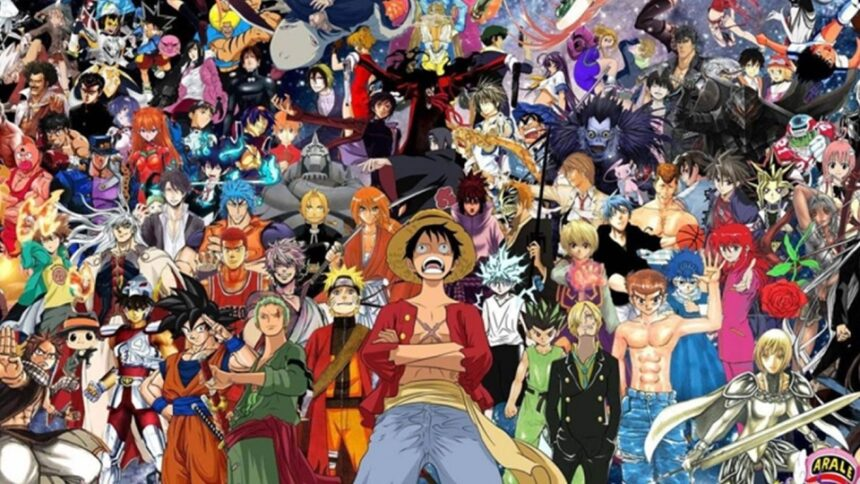

# Importing Libraries

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load the dataset

In [ ]:

data=pd.read_csv("/kaggle/input/all-japanese-anime-titles-in-imdb/imdb_anime.csv")

# Preprocess the data

In [ ]:
data = data[pd.to_numeric(data['User Rating'], errors='coerce').notna()]

In [ ]:


data['Genres'] = data['Genre'].str.split(', ')
data['User Rating'] = data['User Rating'].astype(float)
data['Gross'] = data['Gross'].str.replace(',', '').astype(float)

# Define a TF-IDF Vectorizer to convert genres into numerical vectors

In [ ]:
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'[a-zA-Z0-9]+', lowercase=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Genre'].apply(lambda x: ' '.join(x)))

# Compute the cosine similarity matrix

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get anime recommendations

In [ ]:
def get_recommendations(title):
    idx = data[data['Title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar anime
    anime_indices = [i[0] for i in sim_scores]
    return data[['Title', 'Genre', 'User Rating', 'Gross']].iloc[anime_indices]

# Printing Recommendation

In [ ]:
user_input = "Baki Hanma"
recommendations = get_recommendations(user_input)
print("Recommended Anime:")
display(recommendations)

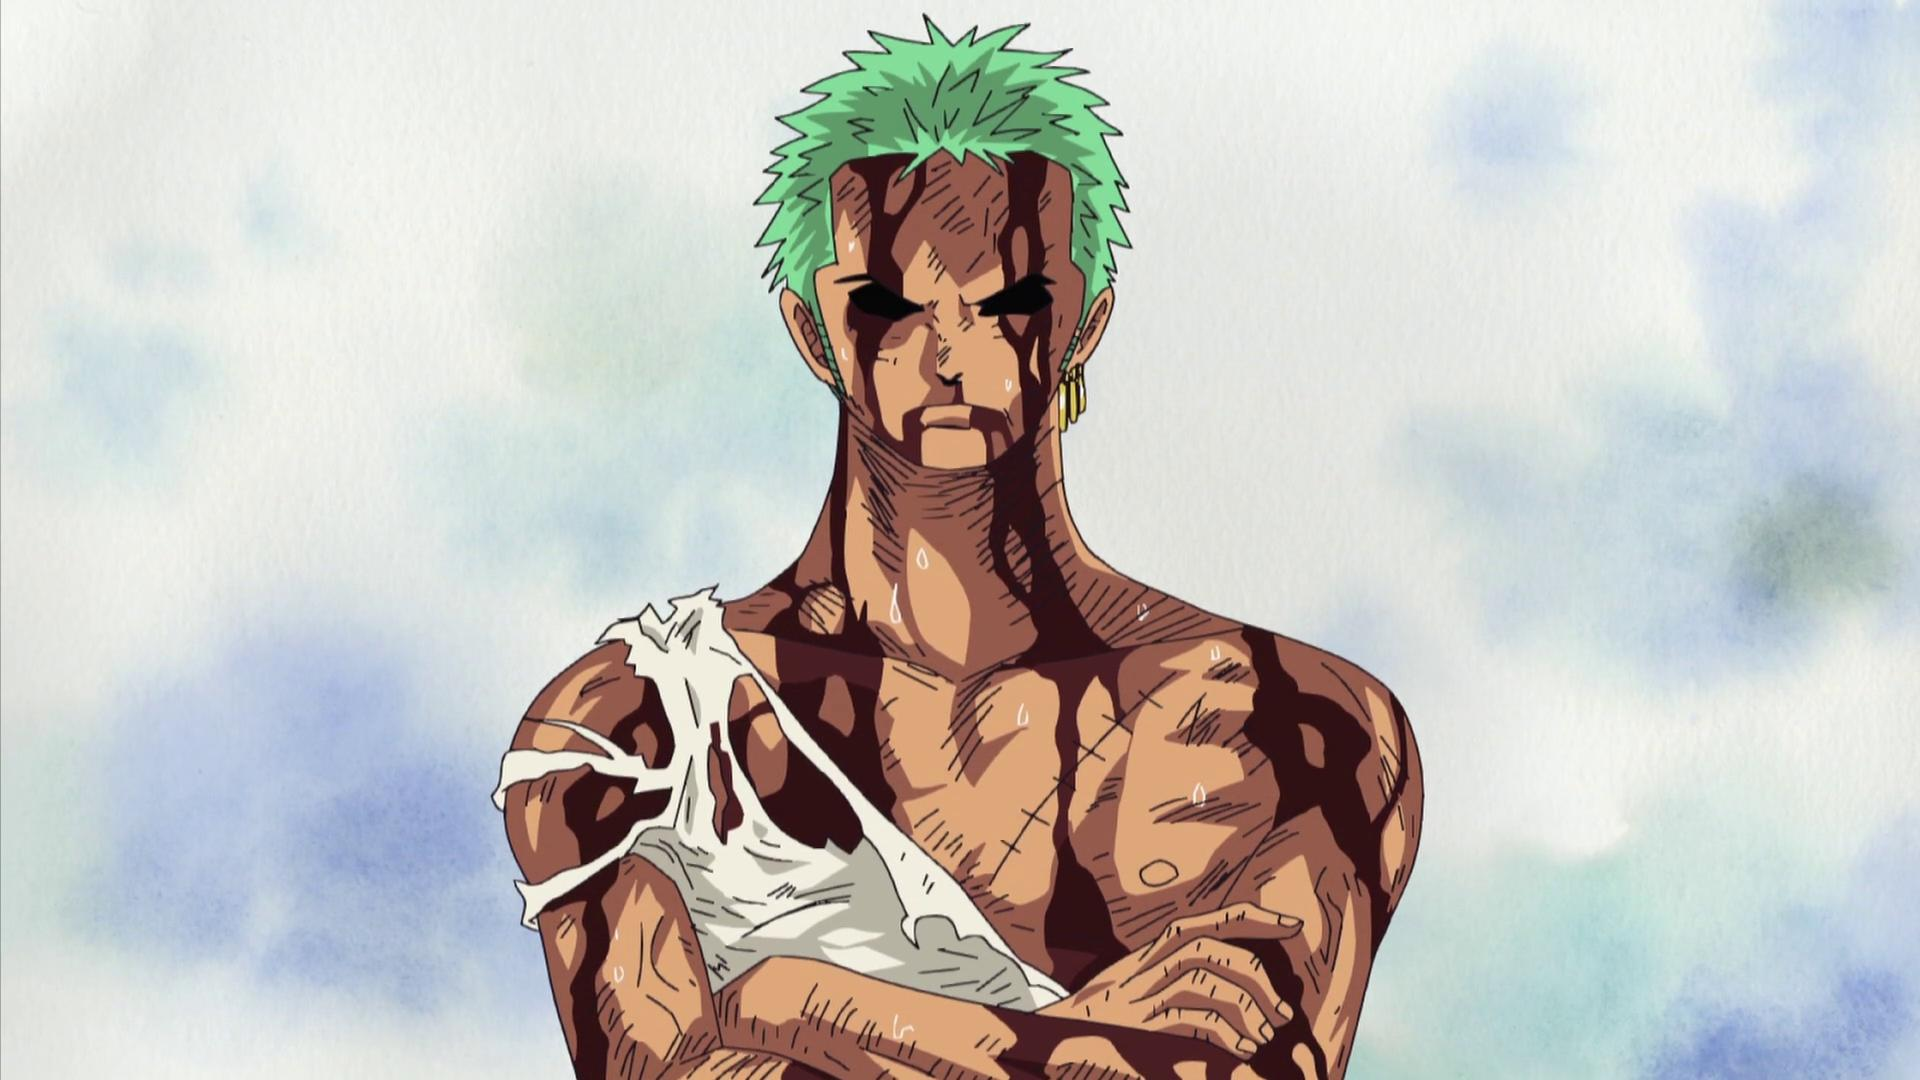

Thank You So Much!

Please Do Share And Upvote If You Like It!